# Exploratory Data Analysis

## Daniel Wooten - January 21 2020

In [1]:
# Import the packages we need
import pandas as pd
import numpy as np
import sklearn as sk
from matplotlib import pyplot as plt
from datetime import datetime
import pytz
import re
import random
pd.set_option('display.max_columns', 50)
%matplotlib inline

In [2]:
# We will need this function later, norammly in another file, this is a notebook.

def convert_to_pyz(entry):
    """This function converts time zone entries from the base data set into time zones acceptable by pytz"""
    
    try:
        
        entry = str(entry)
        
    except:
        
        entry = 'nan'
    
    out = 'Greenwich'
    
    pattern = re.compile(r'Beijing') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Asia/Shanghai'


    pattern = re.compile(r'Central Time \(US & Canada\)') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'US/Central'


    pattern = re.compile(r'Amsterdam') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Amsterdam'


    pattern = re.compile(r'Pacific Time \(US & Canada\)') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'US/Pacific'


    pattern = re.compile(r'nan') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Greenwich'


    pattern = re.compile(r'Edinburgh') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Greenwich'


    pattern = re.compile(r'Hong Kong') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Asia/Hong_Kong'


    pattern = re.compile(r'Eastern Time \(US & Canada\)') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'US/Eastern'


    pattern = re.compile(r'Berlin') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Berlin'


    pattern = re.compile(r'Quito') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Pacific/Galapagos'


    pattern = re.compile(r'Paris') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Paris'


    pattern = re.compile(r'Athens') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Athens'


    pattern = re.compile(r'Santiago') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'America/Santiago'


    pattern = re.compile(r'La Paz') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'America/La_Paz'


    pattern = re.compile(r'Irkutsk') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Asia/Irkutsk'


    pattern = re.compile(r'Arizona') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'US/Arizona'


    pattern = re.compile(r'Atlantic Time (Canada)') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Canada/Atlantic'


    pattern = re.compile(r'Dublin') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Dublin'


    pattern = re.compile(r'London') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/London'


    pattern = re.compile(r'Madrid') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Madrid'


    pattern = re.compile(r'Brasilia') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Brazil/DeNoronha'


    pattern = re.compile(r'Osaka') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Japan'


    pattern = re.compile(r'Buenos Aires') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'America/Argentina/Buenos_Aires'


    pattern = re.compile(r'Moscow') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Moscow'


    pattern = re.compile(r'Lisbon') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Lisbon'


    pattern = re.compile(r'Tokyo') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Japan'


    pattern = re.compile(r'Kuala Lumpur') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Asia/Kuala_Lumpur'


    pattern = re.compile(r'Caracas') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'America/Caracas'


    pattern = re.compile(r'Jakarta') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Asia/Jakarta'


    pattern = re.compile(r'Abu Dhabi') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Asia/Dubai'


    pattern = re.compile(r'Bangkok') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Asia/Bangkok'


    pattern = re.compile(r'Casablanca') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Africa/Casablanca'


    pattern = re.compile(r'Hawaii') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'US/Hawaii'


    pattern = re.compile(r'Mexico City') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'America/Mexico_City'


    pattern = re.compile(r'Mountain Time \(US & Canada\)') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'US/Mountain'


    pattern = re.compile(r'Baghdad') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Asia/Baghdad'


    pattern = re.compile(r'Belgrade') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Belgrade'


    pattern = re.compile(r'Copenhagen') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Copenhagen'


    pattern = re.compile(r'Rome') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Rome'


    pattern = re.compile(r'Tehran') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Asia/Tehran'


    pattern = re.compile(r'Lima') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'America/Lima'


    pattern = re.compile(r'Sydney') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Australia/Sydney'


    pattern = re.compile(r'Helsinki') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Helsinki'


    pattern = re.compile(r'Tbilisi') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Asia/Tbilisi'


    pattern = re.compile(r'Alaska') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'US/Alaska'


    pattern = re.compile(r'Sapporo') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Japan'


    pattern = re.compile(r'Bern') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Zurich'


    pattern = re.compile(r'Sofia') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Sofia'


    pattern = re.compile(r'Jerusalem') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Asia/Jerusalem'


    pattern = re.compile(r'West Central Africa') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Africa/Khartoum'


    pattern = re.compile(r'Brussels') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Brussels'


    pattern = re.compile(r'Ekaterinburg') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Kaliningrad'


    pattern = re.compile(r'Istanbul') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Istanbul'


    pattern = re.compile(r'Bogota') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'America/Bogota'


    pattern = re.compile(r'Singapore') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Asia/Singapore'


    pattern = re.compile(r'International Date Line West') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Pacific/Auckland'


    pattern = re.compile(r'Pretoria') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Africa/Johannesburg'


    pattern = re.compile(r'Greenland') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'America/Godthab'


    pattern = re.compile(r'Central America') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'US/Central'


    pattern = re.compile(r'Melbourne') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Australia/Lord_Howe'


    pattern = re.compile(r'Novosibirsk') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Kaliningrad'


    pattern = re.compile(r'Warsaw') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Warsaw'


    pattern = re.compile(r'Perth') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Australia/Perth'


    pattern = re.compile(r'Stockholm') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Stockholm'


    pattern = re.compile(r'Monterrey') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'America/Mexico_City'


    pattern = re.compile(r'Minsk') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Minsk'


    pattern = re.compile(r'America/Chicago') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'US/Central'


    pattern = re.compile(r'Vienna') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Vienna'


    pattern = re.compile(r'Europe/London') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/London'


    pattern = re.compile(r'Brisbane') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Australia/Brisbane'


    pattern = re.compile(r'Kyiv') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Kiev'


    pattern = re.compile(r'Seoul') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Asia/Seoul'


    pattern = re.compile(r'Harare') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Africa/Harare'


    pattern = re.compile(r'Azores') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Atlantic/Azores'


    pattern = re.compile(r'Mid-Atlantic') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'US/Eastern'


    pattern = re.compile(r'Bratislava') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Bratislava'


    pattern = re.compile(r'Yakutsk') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Asia/Yakutsk'


    pattern = re.compile(r'Mumbai') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Asia/Calcutta'


    pattern = re.compile(r'Saskatchewan') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Canada/Saskatchewan'


    pattern = re.compile(r'Guadalajara') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'US/Central'


    pattern = re.compile(r'Auckland') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Pacific/Auckland'


    pattern = re.compile(r'Ljubljana') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Ljubljana'


    pattern = re.compile(r'Adelaide') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Australia/Adelaide'


    pattern = re.compile(r'Canberra') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Australia/Canberra'


    pattern = re.compile(r'Chihuahua') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'America/Chihuahua'


    pattern = re.compile(r'Taipei') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Asia/Taipei'


    pattern = re.compile(r'Budapest') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Budapest'


    pattern = re.compile(r'Kathmandu') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Asia/Kathmandu'


    pattern = re.compile(r'Islamabad') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Asia/Karachi'


    pattern = re.compile(r'America/New_York') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'US/Eastern'


    pattern = re.compile(r'Prague') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Prague'


    pattern = re.compile(r'America/Sao_Paulo') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'America/Sao_Paulo'


    pattern = re.compile(r'Almaty') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Asia/Almaty'


    pattern = re.compile(r'Cairo') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Africa/Cairo'


    pattern = re.compile(r'Pacific/Guam') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Pacific/Guam'


    pattern = re.compile(r'New Delhi') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Asia/Calcutta'


    pattern = re.compile(r'Astana') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Asia/Almaty'


    pattern = re.compile(r'Riga') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Riga'


    
    return(out)
    

In [3]:
# read in the ras file and convert it to a pandas csv, then close this file
raw_seq_train = open('/home/dwooten/Documents/insight/rl/data/songs/splits/sequence/train_SEQ.csv','r')

In [4]:
seq_train = pd.read_csv(raw_seq_train, sep=',', header=0, index_col=False)

In [5]:
raw_seq_train.close()

In [6]:
# Let's start looking around!
seq_train.sample(10)

,user_id,track_id,hashtag,created_at,score,lang,tweet_lang,time_zone,instrumentalness,liveness,speechiness,danceability,valence,loudness,tempo,acousticness,energy,mode,key,rating,current_track,previous_track
116346,308580291,fda3123438700a9cea4016080873c48d,np,2014-07-02 19:50:26,0.675000,nl,en,Amsterdam,0.000005,0.1170,0.0294,0.731,0.9640,-8.045,129.062,0.447000,0.683,1.0,0.0,1,fda3123438700a9cea4016080873c48d,8eadf0bd2098c54cd7a14d5a95588648
189798,561807620,261eb68af26ab696e973a4760f6c1eae,radionomy,2014-07-04 01:26:26,0.375000,nl,en,NaN,0.846000,0.1010,0.0509,0.489,0.9160,-12.682,184.664,0.315000,0.491,1.0,0.0,1,261eb68af26ab696e973a4760f6c1eae,da3452f4fe1e87ced8e09f3db9a68fc3
68843,81496937,9c79b821c898542d7a96e71715d6d4d5,postpunk,2014-08-15 15:11:15,0.000000,en,en,Central Time (US & Canada),0.585000,0.0835,0.0297,0.495,0.1020,-5.619,150.010,0.041600,0.633,1.0,9.0,1,9c79b821c898542d7a96e71715d6d4d5,9c79b821c898542d7a96e71715d6d4d5
3805,823214346,9b1736a0edbc895b8376f56c59fda495,kiss92,2014-03-04 14:32:54,0.800000,en,en,Beijing,0.000000,0.0838,0.0278,0.713,0.6750,-3.806,126.999,0.002330,0.718,1.0,2.0,1,9b1736a0edbc895b8376f56c59fda495,a053162b9ed156cbcccc1116eeb10468
177728,2205686924,9dca87addf9d5fded7e694ca3c26161b,np,2014-05-10 09:32:46,0.675000,en,en,Eastern Time (US & Canada),0.004870,0.1030,0.0299,0.678,0.8280,-2.729,131.068,0.250000,0.931,1.0,0.0,1,9dca87addf9d5fded7e694ca3c26161b,d49085cd1ac12840376275df9767c342
172749,1617892824,5cbf25f0f194b8710a1ac9844a832d24,np,2014-05-24 07:28:00,0.675000,en,en,Berlin,0.000000,0.1180,0.1560,0.666,0.4150,-4.922,169.946,0.136000,0.627,1.0,2.0,1,5cbf25f0f194b8710a1ac9844a832d24,02f5cf0eb2798bc9a1d3fc3c2c83267b
152148,811851805,6c9d561c953a9f2d7c1eb99cf2d0c893,punk,2014-08-18 13:00:39,0.000000,en,en,Edinburgh,0.177000,0.4530,0.2240,0.215,0.0476,-7.631,161.019,0.045300,0.976,1.0,7.0,1,6c9d561c953a9f2d7c1eb99cf2d0c893,8a5c6d1b293c8aa75438e815ab3e4db1
57354,81496937,0e3f320c2e70071131965bb1e7e5ce73,postpunk,2014-06-05 15:07:36,0.000000,en,en,Central Time (US & Canada),0.877000,0.1860,0.0631,0.515,0.2290,-10.025,147.999,0.388000,0.855,1.0,10.0,1,0e3f320c2e70071131965bb1e7e5ce73,0e3f320c2e70071131965bb1e7e5ce73
168946,126040912,be1bba75e2767e6c06140f417473bbe4,craveradio,2014-07-21 07:36:08,0.300000,en,en,Eastern Time (US & Canada),0.875000,0.3000,0.0771,0.799,0.7700,-6.845,128.006,0.014400,0.553,1.0,0.0,1,be1bba75e2767e6c06140f417473bbe4,e24383c5bfb6150ca063b7f1941cd1e8
107956,268402538,a40d933314935c077d35ef5a6ddd2978,doommetal,2014-08-19 21:32:03,0.221875,en,en,Pacific Time (US & Canada),0.813000,0.1450,0.0589,0.240,0.1420,-7.533,136.165,0.000075,0.747,1.0,9.0,1,a40d933314935c077d35ef5a6ddd2978,a40d933314935c077d35ef5a6ddd2978


It's got the right number of columns and looks well formatted, it should be, this was a data set put out for benchmarking! Let's take a quick tour of the data fields

Here, let's engineer some basic time features

In [7]:
seq_train.user_id = seq_train.user_id.astype('category')

In [8]:
seq_train.user_id.describe()

count        253030
unique         1830
top       823214346
freq          41378
Name: user_id, dtype: int64

In [9]:
seq_train['full_date']=pd.to_datetime(seq_train.created_at)

In [10]:
seq_train.full_date.describe()

count                  253030
unique                 211537
top       2014-07-24 20:15:23
freq                        9
first     2014-01-01 05:54:21
last      2014-09-30 23:57:44
Name: full_date, dtype: object

In [11]:
seq_train.time_zone.describe()

count                         232003
unique                            97
top       Central Time (US & Canada)
freq                           50061
Name: time_zone, dtype: object

In [12]:
seq_train['zoned'] = seq_train.time_zone.apply(lambda x: convert_to_pyz(x))

In [13]:
seq_train.zoned.describe()

count         253030
unique            83
top       US/Central
freq           50097
Name: zoned, dtype: object

In [14]:
seq_train.zoned.sample(5)

10564        Asia/Shanghai
52465           US/Central
77908     Europe/Amsterdam
73497           US/Central
168269          US/Eastern
Name: zoned, dtype: object

In [15]:
seq_train['zone_objects'] = seq_train.zoned.apply(lambda x: pytz.timezone(x))

In [16]:
seq_train['aware'] = seq_train.apply(lambda row: row.zone_objects.localize(row.full_date) , axis = 1)

In [17]:
seq_train['aware'] = seq_train.aware.apply(lambda x: x.astimezone('utc'))

In [18]:
seq_train['day_w']=seq_train.aware.apply(lambda x: x.strftime('%w'))

In [19]:
seq_train.day_w.describe()

count     253030
unique         7
top            1
freq       37008
Name: day_w, dtype: object

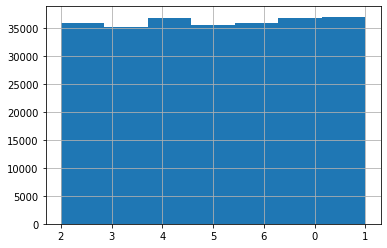

In [20]:
seq_train.day_w.hist(bins=7)

This is surprising, evenly distributed data across the week - this must be a currated result

In [21]:
seq_train.day_w.sample(5)

22151     5
113842    3
15016     0
39804     1
215443    3
Name: day_w, dtype: object

In [22]:
seq_train['day_m']=seq_train.aware.apply(lambda x: x.strftime('%d'))

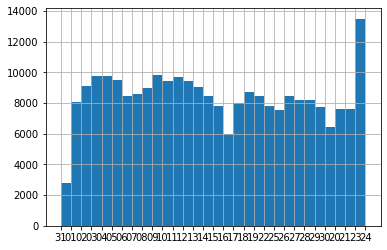

In [23]:
seq_train.day_m.hist(bins=30)

In [24]:
seq_train['hour_d']=seq_train.aware.apply(lambda x: x.strftime('%H'))

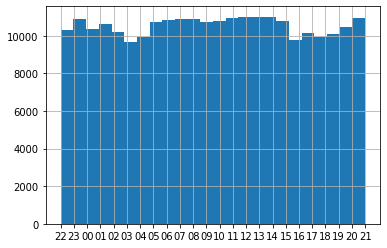

In [25]:
seq_train.hour_d.hist(bins=24)

Absolutely a currated data set, 

In [26]:
seq_train.score.describe()

count    253030.000000
mean          0.512384
std           0.305385
min           0.000000
25%           0.200000
50%           0.675000
75%           0.766667
max           1.000000
Name: score, dtype: float64

In [27]:
seq_train.track_id.unique()[1]

'cc1a46ee0446538ecf6b65db01c30cd8'

How many NaNs do we have?

In [28]:
seq_train = seq_train.drop(axis=1,columns=['time_zone', 'lang', 'full_date', 'zone_objects'])

In [29]:
seq_train['null'] = seq_train.liveness.apply(lambda x: x)

In [30]:
seq_train['null'] = seq_train.apply(lambda x: sum(x.isnull().values.astype('int')), axis = 1)

In [31]:
seq_train.null.describe()

count    253030.000000
mean          0.000209
std           0.044851
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: null, dtype: float64

In [32]:
seq_train.null = seq_train.null.apply(lambda x: 1 if x > 0 else 0)

In [33]:
seq_train.null.sum()

6

We've only got 6 rows with bad data, let's see what's going on

Alrighty, so one track from each of these users doesnt have the Spotify API data

In [34]:
seq_train = seq_train.drop([185804, 232453, 239749, 250171, 252711, 252856])

In [35]:
seq_train = seq_train.drop(axis=1,columns=['null'])

In [37]:
len(seq_train.track_id.unique())

20629

In [ ]:
seq_train = pd.concat([seq_train,pd.get_dummies(seq_train['track_id'])],axis=1)

In [40]:
user = random.choice(seq_train.user_id.unique())

In [41]:
print(user)

969888320


In [94]:
#seq_train.to_pickle('/home/dwooten/Documents/insight/rl/data/songs/clean')

In [95]:
#test = pd.read_pickle('/home/dwooten/Documents/insight/rl/data/songs/clean')

In [96]:
#test.sample(5)

,user_id,track_id,hashtag,created_at,score,tweet_lang,instrumentalness,liveness,speechiness,danceability,valence,loudness,tempo,acousticness,energy,mode,key,rating,current_track,previous_track,zoned,aware,day_w,day_m,hour_d
92799,1083272065,c1c5e61193d08debdb2e14d7f00dcc49,urbantraxxradio,2014-09-15 13:18:57,0.700000,en,0.000,0.3660,0.0455,0.772,0.8540,-6.846,136.676,0.0183,0.670,1.0,2.0,1,c1c5e61193d08debdb2e14d7f00dcc49,c1c5e61193d08debdb2e14d7f00dcc49,Europe/Amsterdam,2014-09-15 11:18:57+00:00,1,15,11
24021,823214346,46b70cd37af791b611d39b6b2d919496,kiss92,2014-06-29 10:28:31,0.800000,en,0.000,0.0587,0.1990,0.466,0.3410,-4.978,160.033,0.0521,0.759,0.0,8.0,1,46b70cd37af791b611d39b6b2d919496,f54919ec082f52715790840bb50bcb79,Asia/Shanghai,2014-06-29 02:28:31+00:00,0,29,02
50848,81496937,b1f5f2e9484a9796e7c2ce893865b4ad,deathrock,2014-04-22 16:29:32,0.190625,en,0.758,0.1340,0.0372,0.715,0.3670,-3.984,138.017,0.0583,0.718,0.0,9.0,1,b1f5f2e9484a9796e7c2ce893865b4ad,647c0c96da3e4a401fe1022c9d0d2cc3,US/Central,2014-04-22 21:29:32+00:00,2,22,21
68650,81496937,f5c3a3391ddfd6597051ad05bdb361cf,deathrock,2014-08-14 12:51:45,0.190625,en,0.117,0.0837,0.0422,0.236,0.1120,-26.409,130.244,0.1720,0.132,0.0,9.0,1,f5c3a3391ddfd6597051ad05bdb361cf,6c92671504f3ef71553c92d57ada0b58,US/Central,2014-08-14 17:51:45+00:00,4,14,17
99748,268402538,e4e9fbeb8566c6fcb8043eb600da4fa3,doommetal,2014-05-05 18:18:03,0.221875,en,0.613,0.4810,0.0710,0.304,0.0596,-9.063,124.052,0.1040,0.775,1.0,9.0,1,e4e9fbeb8566c6fcb8043eb600da4fa3,e4e9fbeb8566c6fcb8043eb600da4fa3,US/Pacific,2014-05-06 01:18:03+00:00,2,05,01


In [50]:
sub_set=seq_train[seq_train['user_id'] == user]

In [61]:
sub =seq_train.groupby('user_id').count()

In [62]:
sub['track_id'].max()

41378

In [63]:
seq_train.shape

(253024, 25)

In [64]:
seq_train.tweet_lang.describe()

count     253024
unique        35
top           en
freq      241191
Name: tweet_lang, dtype: object